In [1]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import (
    MOVIE_LEN, FRAME_SHAPE, 
    load_movie, load_ground_truth_generation_data
)
from unet_basic.model_3d import unet3d, unet3d_simply, plot_model
import tensorflow as tf
import data_gen
from importlib import reload

In [2]:
DATA_PACKED_FOR_GT_GENERATION_PATH = "../dataPackedForGeneration.mat"
MOVIE_PATH = "../preprocessed/preprocessedMovie.h5"

In [3]:
movie = load_movie(MOVIE_PATH)
data_packed = \
    load_ground_truth_generation_data(DATA_PACKED_FOR_GT_GENERATION_PATH)

In [4]:
# from data_gen import DataGenerator
reload(data_gen)
DataSequencer = data_gen.DataSequencer
get_indices_split = data_gen.get_indices_split

In [9]:
indices_all = np.array(range(5,MOVIE_LEN-5))
indices_train, indices_validate, indices_test = \
    get_indices_split(indices_all, data_fraction=0.1)

# Parameters
params = {'spatial_dim': (128, 128),
          'temporal_dim': 8,
          'batch_size': 8,
          'shuffle': True}

# Generators
training_generator = DataSequencer(
    indices_train, movie, data_packed, **params)
validation_generator = DataSequencer(
    indices_validate, movie, data_packed, **params)

In [10]:
validation_dataset = validation_generator.get_all_data()
validation_dataset[1].shape

(225, 128, 128, 1)

In [11]:
input_size = (params['temporal_dim'],) + params['spatial_dim'] + (1,)
model = unet3d_simply(input_size=input_size, start_filters_no=16)
# model.summary()
# plot_model(model, "model.jpg")

In [93]:
EPOCHS = 5
history = model.fit(
  training_generator,
  epochs=EPOCHS, verbose=1)

  ...
    to  
  ['...']
Train for 84 steps
Epoch 1/5
 1/84 [..............................] - ETA: 30:11

ResourceExhaustedError:  OOM when allocating tensor with shape[8,4,128,1,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model_5/up_sampling3d_16/split_2 (defined at <ipython-input-93-d7319e9cdb89>:4) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_40794]

Function call stack:
distributed_function


In [77]:
validation_dataset[0][0:1].shape

(1, 8, 128, 128, 1)

In [15]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

def show_prediction(dataset, index):

    i = index
    x = dataset[0][i:i+1]
    y = dataset[1][i:i+1]

    frame = x[0, len(x)//2-1]
    predictions = model.predict(x)
    dim = frame.shape[:2]
    p = np.max(predictions, 3).reshape(dim)

    display([frame.reshape(dim), p, y.reshape(dim)])

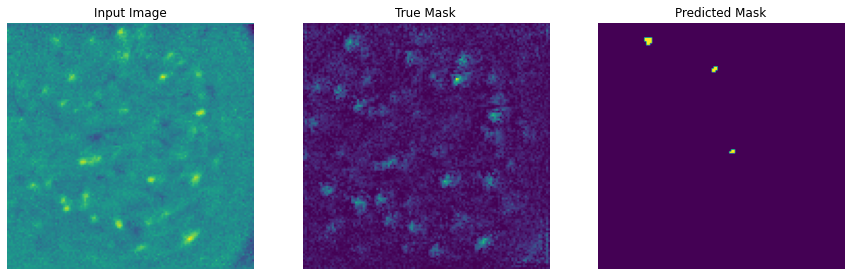

In [18]:
show_prediction(validation_dataset, 8)

In [14]:
a = (1,2,3)
a[:2]

(1, 2)

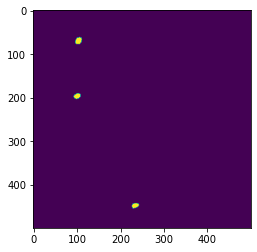

In [14]:
gt = gen.get_y(10)
plt.imshow(gt.reshape(500, 500))


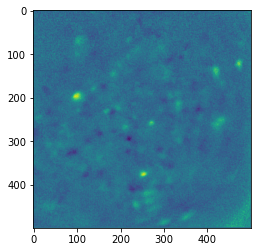

In [15]:
plt.imshow(gen.movie[10])

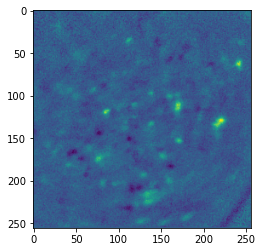

In [22]:
f = gen.movie[0]

f = skimage.transform.resize(f, FRAME_NEW_SHAPE, anti_aliasing=True)
plt.imshow(f)


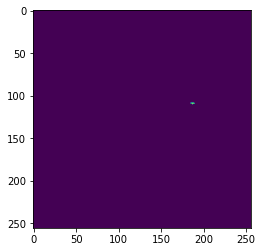

In [24]:
f = gen.filters_binary[0]
f = skimage.transform.resize(f, FRAME_NEW_SHAPE)
plt.imshow(f)